<a href="https://colab.research.google.com/github/aastha12/AV_Jobathan_Feb_2021/blob/main/Final_AV_Jobathon_Feb_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lg
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomTreesEmbedding

In [ ]:
!pip install category-encoders

     |████████████████████████████████| 81kB 6.2MB/s 


In [ ]:
from category_encoders.cat_boost import CatBoostEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
from sklearn.metrics import roc_auc_score,log_loss
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
!pip install catboost

     |████████████████████████████████| 65.7MB 48kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 5.8MB/s 


In [ ]:
# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer

## EDA

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/train_Df64byy.csv')
test_df=pd.read_csv('/content/drive/MyDrive/test_YCcRUnU.csv')

In [ ]:
train_df.shape

(50882, 14)

In [ ]:
test_df.shape

(21805, 13)

In [ ]:
train_df.head()

ID City_Code  Region_Code  ... Reco_Policy_Cat Reco_Policy_Premium  Response
0   1        C3         3213  ...              22             11628.0         0
1   2        C5         1117  ...              22             30510.0         0
2   3        C5         3732  ...              19              7450.0         1
3   4       C24         4378  ...              19             17780.0         0
4   5        C8         2190  ...              16             10404.0         0

[5 rows x 14 columns]

In [ ]:
train_df.tail()

ID City_Code  ...  Reco_Policy_Premium Response
50877  50878        C4  ...               7704.0        0
50878  50879        C5  ...               5408.0        0
50879  50880        C1  ...              11374.0        0
50880  50881        C1  ...              28179.2        1
50881  50882        C3  ...              11424.0        0

[5 rows x 14 columns]

In [ ]:
train_df['Response'].value_counts(normalize=True)

0    0.760053
1    0.239947
Name: Response, dtype: float64

In [ ]:
train_df['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [ ]:
train_df_copy=train_df.copy()

In [ ]:
"""
train_df_copy_plot=train_df.copy()

train_df_copy_plot=train_df_copy_plot[train_df_copy_plot.columns[1:-1]]
test_df_plot=test_df[test_df.columns[1:]]

fig=make_subplots(rows=4,cols=3,subplot_titles=train_df_copy_plot.columns)

index=0

for row in range(1,5):
  for col in range(1,4):
    plot_df=train_df_copy_plot[train_df_copy_plot.columns[index]]
    plot_test_df=test_df_plot[test_df_plot.columns[index]]
    fig.add_trace(go.Histogram(x=plot_df),row=row,col=col)
    fig.add_trace(go.Histogram(x=plot_test_df),row=row,col=col)
    fig.update_layout(barmode='overlay')
    fig.update_traces(opacity=0.6)
    index+=1

fig.update_layout(width=900,height=1250,title_text='Distribution of columns in Train & Test')
fig.show()
"""

"\ntrain_df_copy_plot=train_df.copy()\n\ntrain_df_copy_plot=train_df_copy_plot[train_df_copy_plot.columns[1:-1]]\ntest_df_plot=test_df[test_df.columns[1:]]\n\nfig=make_subplots(rows=4,cols=3,subplot_titles=train_df_copy_plot.columns)\n\nindex=0\n\nfor row in range(1,5):\n  for col in range(1,4):\n    plot_df=train_df_copy_plot[train_df_copy_plot.columns[index]]\n    plot_test_df=test_df_plot[test_df_plot.columns[index]]\n    fig.add_trace(go.Histogram(x=plot_df),row=row,col=col)\n    fig.add_trace(go.Histogram(x=plot_test_df),row=row,col=col)\n    fig.update_layout(barmode='overlay')\n    fig.update_traces(opacity=0.6)\n    index+=1\n\nfig.update_layout(width=900,height=1250,title_text='Distribution of columns in Train & Test')\nfig.show()\n"

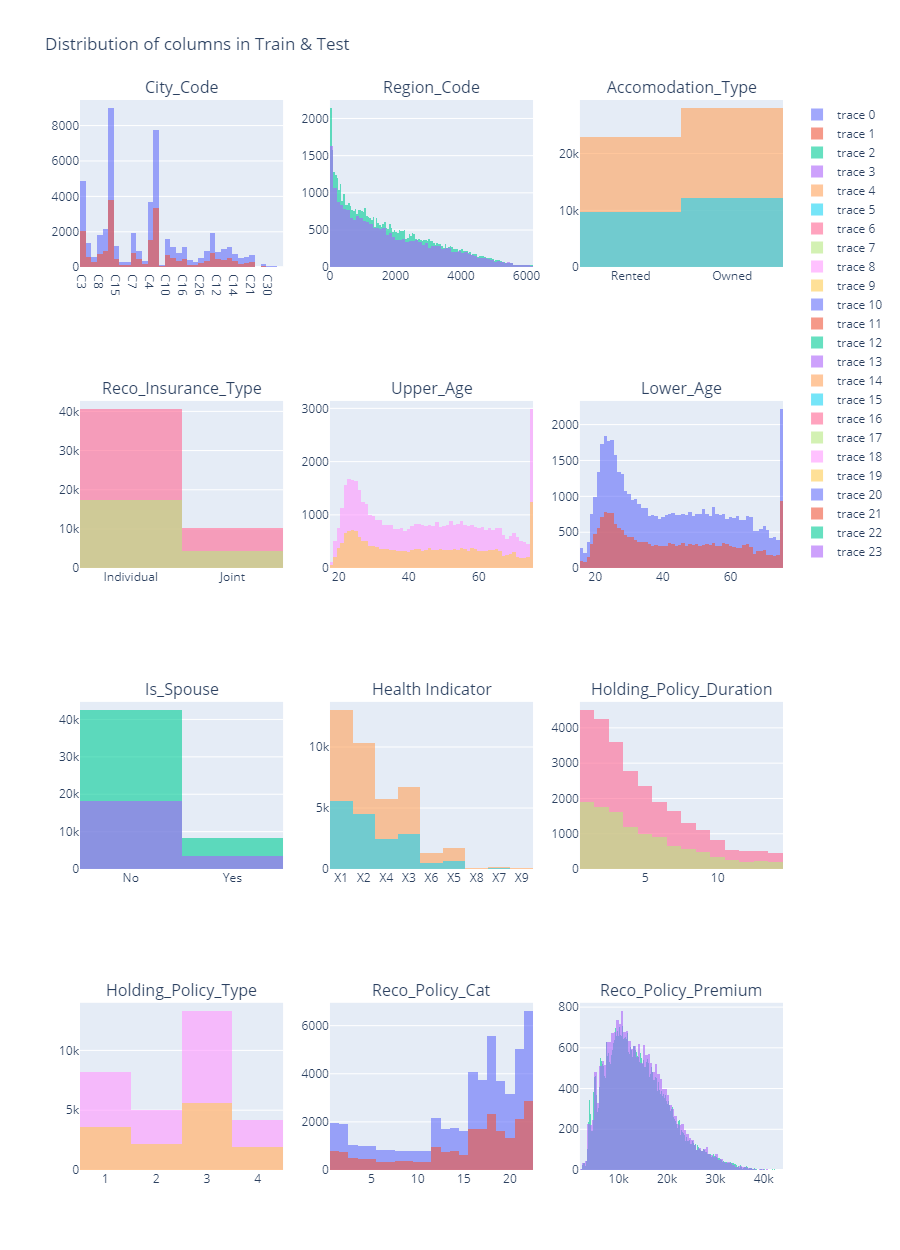

In [ ]:
train_df.isnull().sum()/train_df.shape[0]

ID                         0.000000
City_Code                  0.000000
Region_Code                0.000000
Accomodation_Type          0.000000
Reco_Insurance_Type        0.000000
Upper_Age                  0.000000
Lower_Age                  0.000000
Is_Spouse                  0.000000
Health Indicator           0.229767
Holding_Policy_Duration    0.397999
Holding_Policy_Type        0.397999
Reco_Policy_Cat            0.000000
Reco_Policy_Premium        0.000000
Response                   0.000000
dtype: float64

In [ ]:
train_df.skew()

ID                     0.000000
Region_Code            0.798096
Upper_Age              0.217370
Lower_Age              0.330594
Holding_Policy_Type   -0.198895
Reco_Policy_Cat       -0.928224
Reco_Policy_Premium    0.782463
Response               1.217936
dtype: float64

In [ ]:
train_df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [ ]:
train_df['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [ ]:
train_df['Holding_Policy_Duration']=train_df['Holding_Policy_Duration'].apply(lambda x: '14' if x=='14+' else x)
train_df['Holding_Policy_Duration']=train_df['Holding_Policy_Duration'].astype(np.float64)
test_df['Holding_Policy_Duration']=test_df['Holding_Policy_Duration'].apply(lambda x: '14' if x=='14+' else x)
test_df['Holding_Policy_Duration']=test_df['Holding_Policy_Duration'].astype(np.float64)

In [ ]:
for col in list(train_df.columns):
  try:
    print("Unique values in column {} are:{}".format(col,np.unique(train_df[col])))
  except:
    print("Unique values in column {} are:{}".format(col,train_df[col].value_counts().index))

Unique values in column ID are:[    1     2     3 ... 50880 50881 50882]
Unique values in column City_Code are:['C1' 'C10' 'C11' 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C2'
 'C20' 'C21' 'C22' 'C23' 'C24' 'C25' 'C26' 'C27' 'C28' 'C29' 'C3' 'C30'
 'C31' 'C32' 'C33' 'C34' 'C35' 'C36' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9']
Unique values in column Region_Code are:[   1    2    4 ... 6191 6193 6194]
Unique values in column Accomodation_Type are:['Owned' 'Rented']
Unique values in column Reco_Insurance_Type are:['Individual' 'Joint']
Unique values in column Upper_Age are:[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75]
Unique values in column Lower_Age are:[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75]
Unique values in column Is_S

In [ ]:
train_df.head(1)

ID City_Code  Region_Code  ... Reco_Policy_Cat Reco_Policy_Premium  Response
0   1        C3         3213  ...              22             11628.0         0

[1 rows x 14 columns]

In [ ]:
train_df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [ ]:
test_df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
dtype: object

In [ ]:
train_df.corr()['Response']

ID                         0.005159
Region_Code                0.001121
Upper_Age                  0.002772
Lower_Age                 -0.002099
Holding_Policy_Duration    0.021965
Holding_Policy_Type        0.009297
Reco_Policy_Cat            0.114321
Reco_Policy_Premium        0.007943
Response                   1.000000
Name: Response, dtype: float64

In [ ]:
train_df_copy_plot=train_df.copy()

response_1_df=train_df_copy_plot[train_df_copy_plot['Response']==1]
response_0_df=train_df_copy_plot[train_df_copy_plot['Response']==0]


fig=make_subplots(rows=7,cols=2,subplot_titles=train_df_copy_plot.columns)

index=0

for row in range(1,8):
  for col in range(1,3):
    plot_df=response_1_df[response_1_df.columns[index]]
    plot_test_df=response_0_df[response_0_df.columns[index]]
    fig.add_trace(go.Histogram(x=plot_df,name='1'),row=row,col=col)
    fig.add_trace(go.Histogram(x=plot_test_df,name='0'),row=row,col=col)
    fig.update_layout(barmode='overlay')
    fig.update_traces(opacity=0.6)
    index+=1

fig.update_layout(width=900,height=1250,title_text='Distribution of columns in Train for Response')
fig.show()


## LGBM

In [ ]:
class LgbmFeatureEnggv1:
  
  
  """
  1. Target encode using catboost
  2. Quantile transformation to tackle outliers
  """
  
  def create_X_y(self,train_df,simple_imputation=True):

    X=train_df.copy()

    try:
      X.drop(['Response'],axis=1,inplace=True)
      y=train_df['Response']

    except:
      y=[]
      pass

    finally:
      X.drop(['ID'],axis=1,inplace=True)

    if simple_imputation:
      cat_cols=X.select_dtypes(include=object).columns
      num_cols=X.select_dtypes(exclude=['object','category']).columns

      for col in num_cols:

        if X[col].skew()>=1 or X[col].skew()<=-1:
          X[col].fillna(X[col].median()[0],inplace=True)
        else:
          X[col].fillna(X[col].mean(),inplace=True)
      
      for col in cat_cols:
        
        X[col].fillna(X[col].mode()[0],inplace=True)


    return X,y

  def make_pipeline(self,catboost=True,quantile=True,SMOTE_Balance=False):
    
    target_encoder=CatBoostEncoder(random_state=123)
    qt=QuantileTransformer(random_state=123)
    lgbm=lg.LGBMClassifier(random_state=123)
    imputer = KNNImputer(n_neighbors=5, weights="uniform")
    smt=SMOTE(random_state=123,sampling_strategy =1.0)

    if quantile==True and SMOTE_Balance==False:
      pipe = Pipeline([('Target Encoding',target_encoder),
                        ('Quantile Transformation',qt),
                       ('LGBM',lgbm)
                                ])
    if quantile==False and SMOTE_Balance==False:
      pipe = Pipeline([('Target Encoding',target_encoder),
                       ('LGBM',lgbm)])   

    if SMOTE_Balance==True and quantile==True:
      pipe = Pipeline([('Target Encoding',target_encoder),
                       ('Quantile Transformation',qt),
                       ('SMOTE',smt),
                       ('LGBM',lgbm)])     

    if SMOTE_Balance==True and quantile==False:
      pipe = Pipeline([('Target Encoding',target_encoder),
                       ('SMOTE',smt),
                       ('LGBM',lgbm)]) 
          
    return pipe
    
  def cross_validation(self,pipe,X,y):
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=123)
    cv_results=cross_val_score(pipe,X,y,scoring='roc_auc',cv=cv)
    print("10 Fold ROC AUC Score:",cv_results.mean())
    return cv_results
    

In [ ]:
class FeatureEngg(LgbmFeatureEnggv1):

  def make_pipeline(self,SMOTE_Balance=False):
    
    target_encoder=CatBoostEncoder(random_state=123)
    smt=SMOTE(random_state=123,sampling_strategy =1.0)

    if SMOTE_Balance==False:
      pipe = Pipeline([('Target Encoding',target_encoder)])

    if SMOTE_Balance==True:
      pipe = Pipeline([('Target Encoding',target_encoder),
                       ('SMOTE',smt)])     
          
    return pipe


In [ ]:
train_cat_df=train_df.copy()

for col in list(train_cat_df.select_dtypes(include='object').columns):
  train_cat_df[col]=train_cat_df[col].astype('category')

In [ ]:
train_cat_df.head(1)

ID City_Code  Region_Code  ... Reco_Policy_Cat Reco_Policy_Premium  Response
0   1        C3         3213  ...              22             11628.0         0

[1 rows x 14 columns]

In [ ]:
feature_obj1=FeatureEngg()
X,y=feature_obj1.create_X_y(train_cat_df)

lgbm=lg.LGBMClassifier(random_state=123)

try:
  del pipe3

except:
  pass

finally:
  pipe3=Pipeline([('LGBM',lgbm)])
  print(pipe3)

Pipeline(memory=None,
         steps=[('LGBM',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)


In [ ]:
pipe3.fit(X,y)

Pipeline(memory=None,
         steps=[('LGBM',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

In [ ]:
feature_obj1=FeatureEngg()
X,y=feature_obj1.create_X_y(train_cat_df)

lgbm=lg.LGBMClassifier(random_state=2021)

try:
  del pipe5

except:
  pass

finally:
  pipe5=Pipeline([('LGBM',lgbm)])
  print(pipe5)

Pipeline(memory=None,
         steps=[('LGBM',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=2021, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)


In [ ]:
cv_results=feature_obj1.cross_validation(pipe4,X,y) 

10 Fold ROC AUC Score: 0.6772920303569108


In [ ]:
pipe5.fit(X,y)

Pipeline(memory=None,
         steps=[('LGBM',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=2021, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [ ]:
test_cat_df=test_df.copy()

for col in list(test_cat_df.select_dtypes(include='object').columns):
  test_cat_df[col]=test_cat_df[col].astype('category')

In [ ]:
X_test,y_test=feature_obj1.create_X_y(test_cat_df)
y_pred_pipe5=pipe5.predict_proba(X_test)[:,1]
y_pred_pipe3=pipe3.predict_proba(X_test)[:,1]

## Catboost Pipeline

- 0.6737797739842284 with basic catboost
- 0.6736481389073001 with catboost of class weight 
- 0.6729829142469909 with catboost of 1000 iterations and 5 l2_leaf_reg
- 0.675227676760313 with catboost of 2000 iterations and 5 l2_leaf_reg
- 0.6753942495500523 with catboost of 3000 iterations and 5 l2_lead_reg

In [ ]:
feature_obj1=FeatureEngg()
X,y=feature_obj1.create_X_y(train_df)
cat=CatBoostClassifier(random_state=123,cat_features=list(X.select_dtypes(include='object').columns),iterations=3000,l2_leaf_reg=5)

try: 
  del pipe4

except:
  pass

finally:
  pipe4=Pipeline([('Catboost',cat)])
  print(pipe4)

Pipeline(memory=None,
         steps=[('Catboost',
                 <catboost.core.CatBoostClassifier object at 0x7fc67f6b1210>)],
         verbose=False)


In [ ]:
pipe4.fit(X,y)

In [ ]:
X_test,y_test=feature_obj1.create_X_y(test_df)
y_predpipe4=pipe4.predict_proba(X_test)[:,1]

In [ ]:
sub_df=pd.read_csv('/content/drive/MyDrive/sample_submission_QrCyCoT.csv')

In [ ]:
sub_df.head(1)

ID  Response
0  50883         0

In [ ]:
sub_df.shape

(21805, 2)

In [ ]:
sub_df['Response']= (y_pred_pipe5*0.2+y_pred_pipe3*0.4+y_predpipe4*0.4)

In [ ]:
sub_df.head()

ID  Response
0  50883  0.296779
1  50884  0.254090
2  50885  0.312094
3  50886  0.236671
4  50887  0.224677

In [ ]:
sub_df.to_csv('Weighted_Avg_OF_3.csv',index=False)